# Topic Modelling

Topic modelling adalah teknik pembelajaran mesin yang tidak diawasi (unsupervised) yang digunakan untuk mengidentifikasi kelompok atau grup kata-kata yang serupa dalam suatu teks. Teknik ini secara otomatis menganalisis data teks untuk menentukan kelompok kata untuk suatu set dokumen. Ini dilakukan dengan mendeteksi pola seperti algoritma pengelompokan yang membagi data menjadi bagian yang berbeda. Topic modelling dapat digunakan untuk mengotomatisasi proses menyaring melalui volume data teks yang besar dan membantu untuk mengorganisir dan memahaminya1. Ini adalah teknik otomatis berbasis AI yang mengekstrak topik umum yang sedang dibahas di seluruh volume teks yang besar.

## Import library/package yang dibutuhkan

- Pandas adalah perpustakaan perangkat lunak open-source yang ditulis dalam bahasa pemrograman Python untuk analisis data dan manipulasi data. Dikembangkan oleh Wes McKinney, Pandas menyediakan struktur data yang efisien dan mudah digunakan untuk memanipulasi dan menganalisis data numerik dan tabular. Pandas sangat populer di kalangan data scientist, analis data, dan pengembang perangkat lunak karena kemudahan penggunaannya dan dukungan yang luas dalam ekosistem Python

- re adalah library Python yang menyediakan dukungan untuk ekspresi reguler (regular expressions). Ekspresi reguler adalah urutan karakter yang membentuk pola pencarian. Modul re memungkinkan pencocokkan pola dengan string dan melakukan berbagai operasi seperti pencarian, pencocokan, dan manipulasi string berdasarkan pola tertentu.

In [ ]:
import pandas as pd
import re

## Load data

Memanggil dataset yang akan digunakan dan ditampilkan dalam bentuk dataframe

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dennywr/cobaprosaindata/main/ptautm-fix.csv', index_col=False)

In [ ]:
df = pd.DataFrame(data)
df

# untuk mengecek apakah ada karakter tertentu pada label kolom
# df.columns = df.columns.str.strip()
# for col in df.columns:
#     print(f"'{col}' : {repr(col)}")

,nomor﻿,Judul,Penulis,Dosen Pembimbing I,Dosen Pembimbing II,Abstrak
0,0,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE \...,A.Ubaidillah S.Kom,Budi Setyono M.T,Hermawan S.T,Sistem informasi akademik (SIAKAD) merupaka...
1,1,APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,"M. Basith Ardianto,","Drs. Budi Soesilo, MT","Koko Joni, ST",Berjalannya koneksi jaringan komputer dengan l...
2,2,RANCANG BANGUN APLIKASI PROXY SERVER UNTUK\nEN...,"Akhmad Suyandi, S.Kom","Drs. Budi Soesilo, M.T","Hermawan, ST, MT",Web server adalah sebuah perangkat lunak serve...
3,3,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Heri Supriyanto,"Mulaab, S.Si., M.Kom","Firli Irhamni, ST., M.Kom",Penjadwalan kuliah di Perguruan Tinggi me...
4,4,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Septian Rahman Hakim,"Arik Kurniawati, S.Kom., M.T.","Haryanto, S.T., M.T.",Seiring perkembangan teknologi yang ada diduni...
...,...,...,...,...,...,...
813,853,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Rachmad Agung Pambudi,"Eka Mala Sari Rochman, S.Kom., M.Kom","Sri Herawati, S.Kom., M.Kom",Investasi saham selama ini memiliki resiko ker...
814,854,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Nadila Hidayanti,"Achmad Jauhari, S.T., M.Kom","Ika Oktavia Suzanti, S.Kom., M.Cs",Information Retrieval (IR) merupakan pengambil...
815,855,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Afni Sakinah,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Moch. Kautsar Sophan, S.Kom., M.MT.",Klasifikasi citra merupakan proses pengelompok...
816,856,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Friska Fatmawatiningrum,"Dr. Indah Agustien Siradjuddin, S.Kom., M.Kom.","Prof. Dr. Arief Muntasa, S.Si., M.MT.",Identifikasi atribut pejalan kaki merupakan sa...


In [ ]:
df['Abstrak'] = df['Abstrak'].fillna('').astype(str)

## Preprocessing

Preprocessing merupakan serangkaian langkah atau tahapan yang dilakukan untuk membersihkan, merapihkan, dan mengubah data teks mentah menjadi bentuk yang lebih sesuai untuk analisis atau pemodelan. Proses ini penting karena data teks seringkali datang dalam bentuk yang tidak terstruktur dan memerlukan persiapan khusus sebelum dapat digunakan secara efektif

- Hapus karakter spesial pada teks

> Karakter spesial adalah karakter yang memiliki makna khusus seperti : / $ |




In [ ]:
def removeSpecialText (text):
  text = text.replace('\\t',"").replace('\\n',"").replace('\\u',"").replace('\\',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  return text.replace("http://"," ").replace("https://", " ")
df['Abstrak'] = df['Abstrak'].apply(removeSpecialText)
# df.index += 1
print(df['Abstrak'])

0      Sistem  informasi  akademik  (SIAKAD) merupaka...
1      Berjalannya koneksi jaringan komputer dengan l...
2      Web server adalah sebuah perangkat lunak serve...
3      Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4      Seiring perkembangan teknologi yang ada diduni...
                             ...                        
813    Investasi saham selama ini memiliki resiko ker...
814    Information Retrieval (IR) merupakan pengambil...
815    Klasifikasi citra merupakan proses pengelompok...
816    Identifikasi atribut pejalan kaki merupakan sa...
817    Topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 818, dtype: object


- Hapus tanda baca pada teks

> Tanda baca adalah simbol atau karakter yang digunakan dalam penulisan untuk memberikan arti atau menandai struktur kalimat, misalnya . , ? !

In [ ]:
def removePunctuation(text):
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
  return text

df['Abstrak'] = df['Abstrak'].apply(removePunctuation)
df['Abstrak'].head(20)

0     Sistem  informasi  akademik   SIAKAD  merupaka...
1     Berjalannya koneksi jaringan komputer dengan l...
2     Web server adalah sebuah perangkat lunak serve...
3     Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4     Seiring perkembangan teknologi yang ada diduni...
5     Gerak pekerja ada pada game yang memiliki genr...
6     Perkembangan game yang semakin pesat  memberik...
7     Sistem pengenalan wajah adalah suatu sistem un...
8     Teknologi mobile game beroperating system open...
9     Kantor Badan Kepegawaian kota Bangkalan adalah...
10    Penyusunan Sistem Informasi Dinas Perindustria...
11    Perusahaan pemerintah maupun swasta mempunyai ...
12    Pelayanan makanan bagi pasien rawat inap di Ru...
13    Penyusunan Sistem Pendukung Keputusan pemiliha...
14    Sidik jari adalah salah satu karakteristik fis...
15    Di Indonesia masalah perkembangan gizi adalah ...
16    Pengenalan tulisan tangan merupakan topik pene...
17    Citra senyum merupakan salah satu fitur bi

- Hapus angka pada teks

> Angka adalah simbol matematika yang digunakan untuk menyatakan nilai kuantitatif atau jumlah, misalnya 1, 2, 3, 4, 5, 6

In [ ]:
def removeNumbers (text):
  return re.sub(r"\d+", "", text)
df['Abstrak'] = df['Abstrak'].apply(removeNumbers)
df['Abstrak']

0      Sistem  informasi  akademik   SIAKAD  merupaka...
1      Berjalannya koneksi jaringan komputer dengan l...
2      Web server adalah sebuah perangkat lunak serve...
3      Penjadwalan  kuliah  di  Perguruan  Tinggi  me...
4      Seiring perkembangan teknologi yang ada diduni...
                             ...                        
813    Investasi saham selama ini memiliki resiko ker...
814    Information Retrieval  IR  merupakan pengambil...
815    Klasifikasi citra merupakan proses pengelompok...
816    Identifikasi atribut pejalan kaki merupakan sa...
817    Topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 818, dtype: object

- Ubah semua huruf pada teks menjadi huruf kecil

> Untuk menghindari ambiguitas dan mempermudah pemrosesan teks, terutama dalam konteks perbandingan string dan pencarian teks. Dalam banyak kasus, case folding digunakan untuk mengurangi kompleksitas dan membuat perbandingan teks menjadi lebih konsisten (keseragaman)

In [ ]:
def casefolding(Comment):
  Comment = Comment.lower()
  return Comment
df['Abstrak'] = df['Abstrak'].apply(casefolding)
df['Abstrak']

0      sistem  informasi  akademik   siakad  merupaka...
1      berjalannya koneksi jaringan komputer dengan l...
2      web server adalah sebuah perangkat lunak serve...
3      penjadwalan  kuliah  di  perguruan  tinggi  me...
4      seiring perkembangan teknologi yang ada diduni...
                             ...                        
813    investasi saham selama ini memiliki resiko ker...
814    information retrieval  ir  merupakan pengambil...
815    klasifikasi citra merupakan proses pengelompok...
816    identifikasi atribut pejalan kaki merupakan sa...
817    topik deteksi objek telah menarik perhatian ya...
Name: Abstrak, Length: 818, dtype: object

- Instalasi package/library Sastrawi

> Sastrawi adalah library Python yang bertujuan untuk memfasilitasi pemrosesan bahasa Indonesia. Perpustakaan ini menyediakan alat-alat untuk melakukan stemming (penghapusan awalan atau akhiran kata) dalam bahasa Indonesia. Stemming membantu mengubah kata-kata ke bentuk dasarnya sehingga dapat meningkatkan efisiensi dalam analisis teks.

In [ ]:
!pip install Sastrawi

- Tokenizing dan Stop Words

> - Tokenisasi adalah proses memecah teks menjadi unit-unit kecil yang disebut token. Token dapat berupa kata, frasa, atau entitas lain, tergantung pada tingkat kompleksitas tokenisasi yang diterapkan. Tujuan tokenisasi adalah untuk menyederhanakan teks menjadi bagian-bagian yang lebih mudah diolah. Misalnya, kalimat "Saya suka makan nasi goreng" dapat dipecah menjadi token-token seperti "Saya", "suka", "makan", "nasi", dan "goreng".

> - Stopwords adalah kata-kata umum yang sering muncul dalam teks tetapi tidak memberikan informasi penting tentang konten teks tersebut. Contoh stopwords dalam bahasa Inggris adalah "the", "is", "and", "of", dsb.

In [ ]:
more_stopword = ["ada", "adanya", "adalah", "k", "cf", "z", "zf", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar", "diantaranya", "antara", "antaranya", "diantara", "apa", "apaan", "mengapa", "apabila", "apakah", "apalagi", "apatah", "atau", "ataukah", "ataupun", "bagai", "bagaikan", "sebagai", "sebagainya", "bagaimana", "bagaimanapun", "sebagaimana", "bagaimanakah", "bagi", "bahkan", "bahwa", "bahwasanya", "sebaliknya", "banyak", "sebanyak", "beberapa", "seberapa", "begini", "beginian", "beginikah", "beginilah", "sebegini", "begitu", "begitukah", "begitulah", "begitupun", "sebegitu", "belum", "belumlah", "sebelum", "sebelumnya", "sebenarnya", "berapa", "berapakah", "berapalah", "berapapun", "betulkah", "sebetulnya", "biasa", "biasanya", "bila", "bilakah", "bisa", "bisakah", "sebisanya", "boleh", "bolehkah", "bolehlah", "buat", "bukan", "bukankah", "bukanlah", "bukannya", "cuma", "percuma", "dahulu", "dalam", "dan", "dapat", "dari", "daripada", "dekat", "demi", "demikian", "demikianlah", "sedemikian", "dengan", "depan", "di", "dia", "dialah", "dini", "diri", "dirinya", "terdiri", "dong", "dulu", "enggak", "enggaknya", "entah", "entahlah", "terhadap", "terhadapnya", "hal", "hampir", "hanya", "hanyalah", "harus", "haruslah", "harusnya", "seharusnya", "hendak", "hendaklah", "hendaknya", "hingga", "sehingga", "ia", "ialah", "ibarat", "ingin", "inginkah", "inginkan", "ini", "inikah", "inilah", "itu", "itukah", "itulah", "jangan", "jangankan", "janganlah", "jika", "jikalau", "juga", "justru", "kala", "kalau", "kalaulah", "kalaupun", "kalian", "kami", "kamilah", "kamu", "kamulah", "kan", "kapan", "kapankah", "kapanpun", "dikarenakan", "karena", "karenanya", "ke", "kecil", "kemudian", "kenapa", "kepada", "kepadanya", "ketika", "seketika", "khususnya", "kini", "kinilah", "kiranya", "sekiranya", "kita", "kitalah", "kok", "lagi", "lagian", "selagi", "lah", "lain", "lainnya", "melainkan", "selaku", "lalu", "melalui", "terlalu", "lama", "lamanya", "selama", "selama", "selamanya", "lebih", "terlebih", "bermacam", "macam", "semacam", "maka", "makanya", "makin", "malah", "malahan", "mampu", "mampukah", "mana", "manakala", "manalagi", "masih", "masihkah", "semasih", "masing", "mau", "maupun", "semaunya", "memang", "mereka", "merekalah", "meski", "meskipun", "semula", "mungkin", "mungkinkah", "nah", "namun", "nanti", "nantinya", "nyaris", "oleh", "olehnya", "seorang", "seseorang", "pada", "padanya", "padahal", "paling", "sepanjang", "pantas", "sepantasnya", "sepantasnyalah", "para", "pasti", "pastilah", "per", "pernah", "pula", "pun", "merupakan", "rupanya", "serupa", "saat", "saatnya", "sesaat", "saja", "sajalah", "saling", "bersama", "sama", "sesama", "sambil", "sampai", "sana", "sangat", "sangatlah", "saya", "sayalah", "se", "sebab", "sebabnya", "sebuah", "tersebut", "tersebutlah", "sedang", "sedangkan", "sedikit", "sedikitnya", "segala", "segalanya", "segera", "sesegera", "sejak", "sejenak", "sekali", "sekalian", "sekalipun", "sesekali", "sekaligus", "sekarang", "sekarang", "sekitar", "sekitarnya", "sela", "selain", "selalu", "seluruh", "seluruhnya", "semakin", "sementara", "sempat", "semua", "semuanya", "sendiri", "sendirinya", "seolah", "seperti", "sepertinya", "sering", "seringnya", "serta", "siapa", "siapakah", "siapapun", "disini", "disinilah", "sini", "sinilah", "sesuatu", "sesuatunya", "suatu", "sesudah", "sesudahnya", "sudah", "sudahkah", "sudahlah", "supaya", "tadi", "tadinya", "tak", "tanpa", "setelah", "telah", "tentang", "tentu", "tentulah", "tentunya", "tertentu"]

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


#Inisialisasi fungsi stop words
stop_factory = StopWordRemoverFactory()

words = []

#Membuat perulangan untuk memasukkan dataset ke dalam tekonisasi dan list stopwords
for i in range (len(df['Abstrak'])):

  #Inisialisai fungsi tokenisasi dan stopword
  tokens = word_tokenize(df['Abstrak'][i])
  data = stop_factory.get_stop_words()+more_stopword
  stopword = stop_factory.create_stop_word_remover()

  #Melakukan removed kata
  removed = []
  for t in tokens:
      if t not in data:
          removed.append(t)

  #Memasukkan hasil removed kedalem variable words
  words.append(removed)
  print(removed)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['sistem', 'informasi', 'akademik', 'siakad', 'sistem', 'informasi', 'berfungsi', 'menangani', 'pengelolaan', 'penyajian', 'data', 'data', 'akademik', 'pihak', 'fakultas', 'siakad', 'dianggap', 'penting', 'memberikan', 'pelayanan', 'mahasiswa', 'membutuhkan', 'informasi', 'akademik', 'universitas', 'trunojoyo', 'tersedia', 'siakad', 'menggunakan', 'database', 'terpusat', 'sistem', 'memberikan', 'kelebihan', 'perawatannya', 'mudah', 'membutuhkan', 'biaya', 'sistem', 'berpotensi', 'mengahadapi', 'kendala', 'kendala', 'proses', 'transaksi', 'data', 'padatnya', 'jaringan', 'menuju', 'database', 'siakad', 'kelambatan', 'pemrosesan', 'respon', 'query', 'data', 'tersimpan', 'besar', 'pemrosesan', 'kompleks', 'memiliki', 'kelemahan', 'ketersediaan', 'data', 'sistem', 'memerlukan', 'pengembangan', 'sistem', 'database', 'baik', 'menggunakan', 'sistem', 'databases', 'terdistribusi', 'fakultas', 'dijadikan', 'solusi', 'permasalahan', 'atas', 'basisdata', 'terdistribusi', 'terdapat', 'keuntungan', 

- Melakukan penggabungan kata dari hasil tokenisasi

In [ ]:
join=[]
for i in range(len(words)):
  join_words = ' '.join(words[i])
  join.append(join_words)

result = pd.DataFrame(join, columns=['Join Words'])
result

,Join Words
0,sistem informasi akademik siakad sistem inform...
1,berjalannya koneksi jaringan komputer lancar g...
2,web server perangkat lunak server berfungsi me...
3,penjadwalan kuliah perguruan tinggi masalah ko...
4,seiring perkembangan teknologi didunia muncul ...
...,...
813,investasi saham memiliki resiko kerugian besar...
814,information retrieval ir pengambilan informasi...
815,klasifikasi citra proses pengelompokan piksel ...
816,identifikasi atribut pejalan kaki salah satu p...


## TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang digunakan mengevaluasi seberapa penting sebuah kata bagi sebuah dokumen dalam kumpulan dokumen dengan cara mengalikan berapa kali sebuah kata muncul dalam sebuah dokumen (Term Frequency) dengan frekuensi dokumen terbalik (Inverse Document Frequency) dari kata di seluruh set dokumen.

### Term Frequency (TF)

$\text{TF}(t, d) = \frac{\text{jumlah kemunculan term } t \text{ dalam dokumen } d}{\text{total jumlah term dalam dokumen } d}
$

### Inverse Document Frequency (IDF)

$\text{IDF}(t, D) = \log\left(\frac{\text{total jumlah dokumen dalam korpus } |D|}{\text{jumlah dokumen yang mengandung term } t + 1}\right)
$

### Term Frequency-Inverse Document Frequency (TF-IDF)

$\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)$


Penjelasan:

- t adalah term (kata kunci),
- d adalah dokumen,
- D adalah korpus (kumpulan dokumen),
- ∣D∣ adalah total jumlah dokumen dalam korpus.

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords', quiet=True)

True

In [ ]:
finalResult = pd.DataFrame(join, columns=['Join Words'])
finalResult

,Join Words
0,sistem informasi akademik siakad sistem inform...
1,berjalannya koneksi jaringan komputer lancar g...
2,web server perangkat lunak server berfungsi me...
3,penjadwalan kuliah perguruan tinggi masalah ko...
4,seiring perkembangan teknologi didunia muncul ...
...,...
813,investasi saham memiliki resiko kerugian besar...
814,information retrieval ir pengambilan informasi...
815,klasifikasi citra proses pengelompokan piksel ...
816,identifikasi atribut pejalan kaki salah satu p...


> membuat matriks TF-IDF dari teks dalam kolom 'Join Words' dari dataframe finalResult. Pertama, dilakukan impor modul stopwords dari NLTK untuk mendapatkan daftar stopwords dalam bahasa Indonesia. Selanjutnya, dibuat tokenizer dengan RegexpTokenizer untuk memproses teks. Kemudian, menggunakan TfidfVectorizer dari scikit-learn, teks diubah menjadi representasi vektor TF-IDF. Proses ini mencakup pengonversian huruf menjadi huruf kecil, penggunaan stopwords, dan penerapan tokenizer. Matriks TF-IDF yang dihasilkan, disimpan dalam variabel tfidf_matrix

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)

stopwords = stopwords.words('indonesian')

tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(lowercase=True,
                        stop_words=stopwords,
                        tokenizer = tokenizer.tokenize)


tfidf_matrix = vectorizer.fit_transform(finalResult['Join Words'])
tfidf_terms = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
def sklearn_frequency_vectorize(corpus):
    # The Scikit-Learn frequency vectorize method
    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer()
    # mengembalikan frekuensi kemunculan
    return vectorizer.fit_transform(corpus)
vectsklen=sklearn_frequency_vectorize(finalResult['Join Words'])
print(vectsklen)

  (0, 7244)	7
  (0, 2832)	3
  (0, 102)	3
  (0, 7174)	4
  (0, 627)	1
  (0, 4397)	1
  (0, 5796)	1
  (0, 5945)	1
  (0, 1286)	5
  (0, 6230)	1
  (0, 2263)	2
  (0, 1431)	1
  (0, 5933)	1
  (0, 4261)	2
  (0, 5497)	1
  (0, 4004)	1
  (0, 4284)	2
  (0, 8175)	1
  (0, 8063)	1
  (0, 7858)	1
  (0, 4600)	2
  (0, 1287)	3
  (0, 7849)	2
  (0, 3280)	1
  (0, 6021)	1
  :	:
  (817, 7005)	1
  (817, 7621)	1
  (817, 3595)	1
  (817, 4704)	1
  (817, 5246)	1
  (817, 746)	1
  (817, 3383)	1
  (817, 297)	2
  (817, 5242)	1
  (817, 8255)	1
  (817, 7388)	1
  (817, 4618)	1
  (817, 3249)	1
  (817, 6941)	1
  (817, 6304)	1
  (817, 7854)	1
  (817, 8420)	4
  (817, 8421)	1
  (817, 3948)	1
  (817, 5241)	1
  (817, 909)	1
  (817, 2553)	1
  (817, 1377)	1
  (817, 231)	1
  (817, 6398)	2


Vector Space Model (VSM)

> (Vector Space Model atau VSM) adalah representasi matematis dari dokumen-dokumen dalam suatu korpus atau koleksi teks. Dalam VSM, setiap dokumen direpresentasikan sebagai vektor dalam ruang vektor yang memiliki dimensi sebanding dengan jumlah kata unik dalam seluruh korpus. Setiap dimensi vektor mewakili kata tertentu, dan nilai dalam dimensi tersebut dapat mencerminkan berbagai informasi, seperti frekuensi kemunculan kata atau skor TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Membuat objek CountVectorizer
coun_vect = CountVectorizer(stop_words=stopwords)
count_matrix = coun_vect.fit_transform(finalResult['Join Words'])
count_array = count_matrix.toarray()
# Membuat DataFrame dari array dengan kolom berdasarkan term dalam teks
df = pd.DataFrame(data=count_array,columns = coun_vect.vocabulary_.keys())
df

,sistem,informasi,akademik,siakad,berfungsi,menangani,pengelolaan,penyajian,data,fakultas,...,accelerated,segment,augmentasi,weak,stump,ransel,diseimbangkan,detector,anchor,pretrained
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# menampilkan bobot dari masing-masing term
vsc = pd.DataFrame(data=tfidf_matrix.toarray(),columns = vectorizer.vocabulary_.keys())
print("\nTF-IDF Vectorizer\n")
vsc


TF-IDF Vectorizer



,sistem,informasi,akademik,siakad,berfungsi,menangani,pengelolaan,penyajian,data,fakultas,...,accelerated,segment,augmentasi,weak,stump,ransel,diseimbangkan,detector,anchor,pretrained
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,0.110241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
816,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(tfidf_matrix)

  (0, 3844)	0.09069730384885567
  (0, 5188)	0.12724631046869836
  (0, 3135)	0.07383613705384358
  (0, 394)	0.10209984869606901
  (0, 6495)	0.11989144188729525
  (0, 1847)	0.09329305839793588
  (0, 5660)	0.08640936794015826
  (0, 1668)	0.07937555796752149
  (0, 3416)	0.09069730384885567
  (0, 480)	0.2397828837745905
  (0, 5986)	0.05152568947318163
  (0, 7168)	0.06438015603712499
  (0, 1569)	0.07336495893021809
  (0, 7583)	0.21463642200196115
  (0, 1259)	0.12724631046869836
  (0, 5675)	0.060791728043903426
  (0, 3390)	0.08547894154394411
  (0, 3206)	0.08217174922835124
  (0, 4221)	0.03735088915640272
  (0, 3507)	0.0814312652781339
  (0, 7695)	0.08640936794015826
  (0, 6414)	0.156248145925082
  (0, 6609)	0.08294375245295899
  (0, 5500)	0.268579853429263
  (0, 3194)	0.12724631046869836
  :	:
  (817, 5365)	0.20560618934721916
  (817, 7418)	0.058717295893768846
  (817, 3092)	0.0721282446495568
  (817, 1066)	0.04839181469668886
  (817, 4523)	0.07459444982105382
  (817, 3982)	0.052944739157877

## Model LDA (Latent Dirichlet Dllocation)

Latent Dirichlet Allocation (LDA) adalah salah satu metode yang paling populer untuk melakukan topic modelling. Setiap dokumen terdiri dari berbagai kata dan setiap topik dapat dikaitkan dengan beberapa kata. Tujuannya adalah untuk menemukan topik yang menjadi milik dokumen, berdasarkan kata-kata yang ada di dalamnya

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

## Proporsi kata dalam topik

In [ ]:
# jumlah topik
n_topics = 2

lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tfidf_matrix)

# membuat dataframe untuk menampilkan proporsi
topics_df = pd.DataFrame(lda.components_, columns=tfidf_terms)

# menambahkan nama topik sebagai indeks
topics_df.index = ['Topik {}'.format(i) for i in range(n_topics)]

# menampilkan dataframe
topics_df

,a,aalysis,aam,abad,abadi,ability,abjad,absensi,absolut,absolute,...,zaman,zara,zat,zcz,zona,zone,zoning,zoom,zucara,zungu
Topik 0,1.713405,0.630303,0.660230,0.573463,0.653713,0.503573,0.826074,1.004964,0.606272,0.829356,...,0.959718,0.651924,0.581481,0.577988,1.051482,0.737765,0.818436,0.507835,0.502562,0.502562
Topik 1,0.908952,0.503950,0.504178,0.565439,0.504888,0.606432,0.513852,0.514406,0.505372,0.596750,...,0.740915,0.505181,0.506688,0.503350,0.505727,0.506250,0.506917,0.774305,0.594023,0.594023


In [ ]:
# jumlah topik
n_topics = 10

# jumlah kata per topik
n_words = 10

lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tfidf_matrix)

# menampilkan topik
for idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (idx))
    print([(tfidf_terms[i], topic[i]) for i in topic.argsort()[:-n_words - 1:-1]])


Topic 0:
[('koperasi', 2.1873173328247573), ('tangan', 2.067620544989773), ('ukm', 1.9248873095054855), ('pendapat', 1.4831466307169907), ('nomor', 1.101244331938536), ('reward', 1.0804434428524212), ('keluhan', 1.030412798684977), ('tulisan', 1.0148245667341054), ('karyawan', 0.9977831675885578), ('telapak', 0.871477859895072)]
Topic 1:
[('senyum', 1.404800228930733), ('museum', 1.3795356356213144), ('mobil', 1.17184017090705), ('bimbingan', 1.1151139682492162), ('konseling', 1.0942718779161456), ('plat', 1.0010676278257071), ('arab', 0.9819562702433713), ('kelamin', 0.9648496946073701), ('kamera', 0.9625134992645117), ('lbp', 0.8800664035461455)]
Topic 2:
[('cluster', 2.4954294007920303), ('penyakit', 2.2205112664213282), ('som', 2.0010547409074033), ('pemerataan', 1.5900998256933874), ('self', 1.472385375399178), ('puskesmas', 1.4217684247770221), ('organizing', 1.3915996485317927), ('ginjal', 1.2603726998433142), ('epilepsi', 1.2194538184365147), ('clustering', 1.0445814734464411)]

## Proporsi topik dalam dokumen

In [ ]:
# mendapatkan proporsi topik untuk setiap dokumen
doc_topic_distrib = lda.transform(tfidf_matrix)
topic_word_distrib = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
# dataframe
doc_topic_df = pd.DataFrame(doc_topic_distrib, columns=[f'Topic_{i}' for i in range(n_topics)])
doc_topic_df = pd.concat([finalResult['Join Words'], doc_topic_df], axis=1)
doc_topic_df[[f'Topic_{i}' for i in range(n_topics)]].apply(lambda x: x.argmax(), axis=1)

doc_topic_df

,Join Words,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,sistem informasi akademik siakad sistem inform...,0.013625,0.013625,0.013626,0.013625,0.013626,0.013627,0.386937,0.013625,0.013625,0.504057
1,berjalannya koneksi jaringan komputer lancar g...,0.017125,0.017123,0.017142,0.017121,0.017131,0.017120,0.426933,0.017123,0.200853,0.252329
2,web server perangkat lunak server berfungsi me...,0.016291,0.016291,0.016291,0.016303,0.016309,0.451887,0.016310,0.016292,0.016293,0.417732
3,penjadwalan kuliah perguruan tinggi masalah ko...,0.016811,0.016812,0.016809,0.016809,0.016812,0.016811,0.386179,0.233760,0.016809,0.262389
4,seiring perkembangan teknologi didunia muncul ...,0.014603,0.014604,0.014603,0.014603,0.014611,0.014604,0.014918,0.014603,0.270991,0.611860
...,...,...,...,...,...,...,...,...,...,...,...
813,investasi saham memiliki resiko kerugian besar...,0.013197,0.013197,0.013196,0.013220,0.314558,0.013197,0.013234,0.013196,0.013196,0.579807
814,information retrieval ir pengambilan informasi...,0.012902,0.012902,0.012901,0.012901,0.012901,0.012901,0.012902,0.012901,0.012901,0.883889
815,klasifikasi citra proses pengelompokan piksel ...,0.011898,0.219590,0.011899,0.011900,0.011899,0.011900,0.011910,0.011899,0.011905,0.685199
816,identifikasi atribut pejalan kaki salah satu p...,0.014940,0.014948,0.014940,0.014945,0.014975,0.224457,0.015037,0.014940,0.014940,0.655877


## Clustering

Clustering adalah proses pengelompokan sekelompok objek menjadi kelas atau cluster berdasarkan kesamaan mereka1. Objek dalam cluster yang sama lebih mirip satu sama lain daripada objek di cluster lain. Pada kasus ini, metode clustering yang digunakan adalah K-Means.

In [ ]:
from sklearn.cluster import KMeans

# Menjalankan algoritma k-means
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(tfidf_matrix)

# Menampilkan hasil clustering
judul = []
cluster = []
for i, doc in enumerate(finalResult['Join Words']):
  judul.append(doc)
  cluster.append(kmeans.labels_[i])

data = {'Judul': judul, 'Cluster': cluster}
dfCluster = pd.DataFrame(data)
dfCluster

,Judul,Cluster
0,sistem informasi akademik siakad sistem inform...,1
1,berjalannya koneksi jaringan komputer lancar g...,1
2,web server perangkat lunak server berfungsi me...,1
3,penjadwalan kuliah perguruan tinggi masalah ko...,1
4,seiring perkembangan teknologi didunia muncul ...,1
...,...,...
813,investasi saham memiliki resiko kerugian besar...,1
814,information retrieval ir pengambilan informasi...,1
815,klasifikasi citra proses pengelompokan piksel ...,2
816,identifikasi atribut pejalan kaki salah satu p...,1


## Evaluasi (Silhoutte Coefficient)

Silhoutte Coefficient adalah metode untuk menginterpretasikan dan memvalidasi konsistensi dalam kluster data. Nilai Silhouette adalah ukuran seberapa mirip suatu objek dengan klusternya sendiri (kohesi) dibandingkan dengan kluster lain (separasi). Nilai Silhouette berkisar dari -1 hingga +1, di mana nilai tinggi menunjukkan bahwa objek tersebut cocok dengan klusternya sendiri dan tidak cocok dengan kluster tetangga. Jika sebagian besar objek memiliki nilai Silhouette yang tinggi, maka konfigurasi pengelompokan tersebut sesuai. Jika banyak titik memiliki nilai rendah atau negatif, maka konfigurasi pengelompokan mungkin memiliki terlalu banyak atau terlalu sedikit kluster.

In [ ]:
from sklearn.metrics import silhouette_score

# Prediksi cluster untuk setiap sampel
preds = kmeans.predict(tfidf_matrix)

# Hitung skor silhouette
score = silhouette_score(tfidf_matrix, preds)

print("Silhouette score: ", score)

Silhouette score:  0.015405748145607738


## Klasifikasi

Klasifikasi adalah proses menemukan model yang dapat membedakan dan mendeskripsikan kelas-kelas dalam data. Pada kasus ini metode klasifikasi yang digunakan adalah Naive Bayes.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(dfCluster['Judul'], dfCluster['Cluster'], test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur menggunakan CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Membuat dan melatih model Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Melakukan prediksi pada data testing
y_pred = nb.predict(X_test_vec)

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.98      0.96      0.97       131
           2       0.84      1.00      0.91        21

    accuracy                           0.95       164
   macro avg       0.91      0.90      0.90       164
weighted avg       0.95      0.95      0.95       164



## Evaluasi (Confusion Matrix)

Confusion Matrix adalah alat evaluasi kinerja yang umum digunakan dalam pengklasifikasi untuk memahami sejauh mana model klasifikasi berhasil dalam memprediksi kelas target. Confusion matrix memberikan gambaran rinci tentang hasil klasifikasi dengan membandingkan prediksi model dengan nilai sebenarnya.

Confusion Matrix terdiri dari empat unsur utama:

- True Positive (TP): Jumlah sampel yang benar-benar termasuk dalam kelas positif dan telah diprediksi dengan benar sebagai kelas positif oleh model.

- True Negative (TN): Jumlah sampel yang benar-benar termasuk dalam kelas negatif dan telah diprediksi dengan benar sebagai kelas negatif oleh model.

- False Positive (FP): Jumlah sampel yang sebenarnya termasuk dalam kelas negatif, tetapi salah diprediksi sebagai kelas positif oleh model.

- False Negative (FN): Jumlah sampel yang sebenarnya termasuk dalam kelas positif, tetapi salah diprediksi sebagai kelas negatif oleh model,

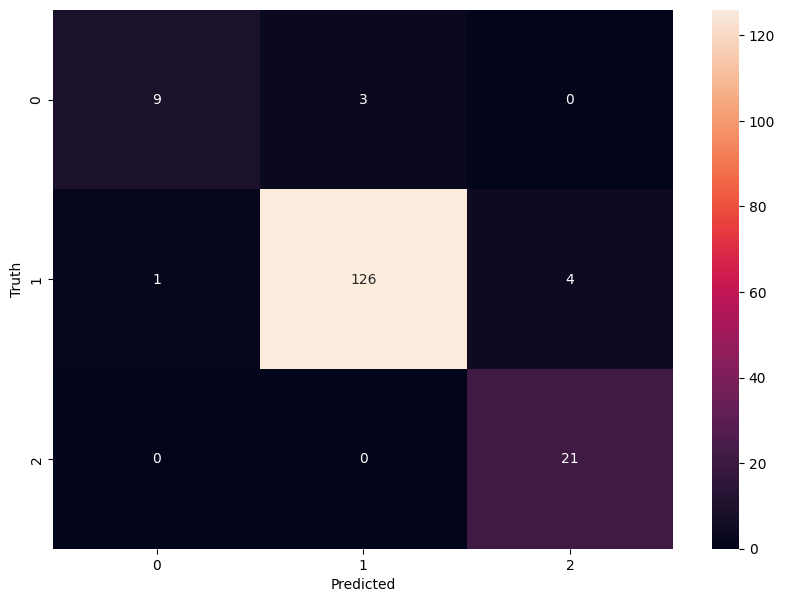

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()